<a href="https://colab.research.google.com/github/azkialt/folium_project_n3ts/blob/main/Azkia_Latansa_Tasykurina_X_4_Kota_Salatiga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Tugas Project

1. import folium, pandas, geopandas, dan drive.
2. load data shapefile, pilih kota/kabupaten yang akan dianalisis
3. load data csv dan proses merge/join data
4. load peta choropleth

In [ ]:
# Import Library

import folium
import pandas as pd
import geopandas as gpd
from google.colab import drive

Pilih nama kota / kabupaten kalian. jika tidak muncul pastikan namanya sesuai dengan nama di link berikut :
https://geoservices.big.go.id/portal/apps/webappviewer/index.html?id=cb58db080712468cb4bfd408dbde3d70

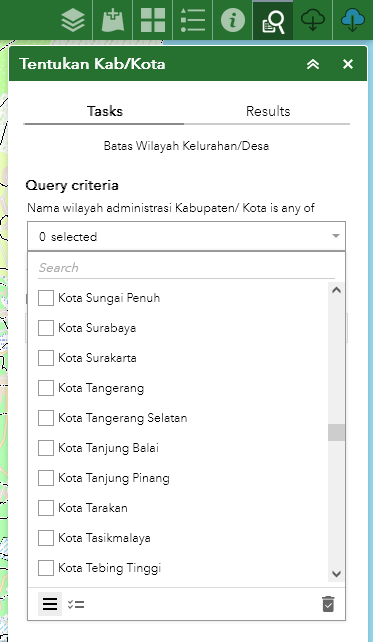

In [ ]:
# Read Data Shapefile

drive.mount('/content/drive')

# Shapefile Admin Indonesia (tidak usah diubah2) Warning! File besar 1.4gb
indonesia_admin = gpd.read_file('/content/drive/MyDrive/ADMIN_INDO/ADMINISTRASI_AR_DESAKEL_10K.shp')

# Pilih Kota/Kabupaten yang ingin ditampilkan, contoh 'Kota Tangerang Selatan'
aoi_admin = indonesia_admin[indonesia_admin['WADMKK'] == 'Kota Salatiga']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CSV file path
csv_path = 'data salatiga revisi.csv'

# Read shapefile
admin_gdf = aoi_admin

# Read CSV data
csv_data = pd.read_csv(csv_path)

print(csv_data.head())
print(admin_gdf.head())
# Convert column names to lowercase
csv_data['Kelurahan'] = csv_data['Kelurahan'].str.lower().str.replace(' ', '')
admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.lower().str.replace(' ', '')
#csv_data['jumlah penduduk (jiwa)'] = csv_data['Jumlah penduduk (jiwa)'].astype(str).str.replace('.', '')
#csv_data['Jumlah penduduk (jiwa)'] = pd.to_numeric(csv_data['Jumlah penduduk (jiwa) '])

# Fix typo to merge properly
#admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.replace('Husein Sastranegara ', 'HUSEN SASTRANEGARA')
#csv_data['Kelurahan'] = csv_data['Kelurahan'].str.replace('perigibaru', 'parigibaru')

# Merge data
merged_data = pd.merge(admin_gdf, csv_data, left_on='NAMOBJ', right_on='Kelurahan', how='left')

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged_data, geometry=merged_data.geometry)

print(merged_gdf.head())
# Now you can use merged_gdf for further analysis and visualization

      Kelurahan  jumlah penduduk
0      Sidorejo            54037
1     Blotongan            12951
2  Sidorejo Lor            14385
3      Salatiga            14779
4         Bugel             3365
      OBJECTID     NAMOBJ       FCODE REMARK  \
2490    2491.0  Blotongan  BA03070040   None   
2562    2563.0      Bugel  BA03070040   None   
2661    2662.0   Cebongan  BA03070040   None   
2793    2794.0      Dukuh  BA03070040   None   
2881    2882.0  Gendongan  BA03070040   None   

                                          METADATA     SRS_ID KDBBPS KDCBPS  \
2490  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
2562  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
2661  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
2793  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
2881  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   

        KDCPUM KDEBPS  ...         WAD

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
# Create a base map
m = folium.Map(location=[-7.329992588862978, 110.50857838128051], zoom_start=11)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=["Kelurahan", "jumlah penduduk"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah Penduduk"
).add_to(m)

jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='jumlah penduduk',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKD','jumlah penduduk'],
        aliases=['Kelurahan','Jumlah Penduduk']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

In [ ]:
# Create a base map
m = folium.Map(location=[-7.329992588862978, 110.50857838128051], zoom_start=13)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=["Kelurahan", "jumlah penduduk"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah Penduduk"
).add_to(m)

# Create/import data sma
data_sma = pd.read_csv('SMA_salatiga.csv')

data_sma['geometry'] = gpd.GeoSeries.from_wkt(data_sma['WKT'])

# Extract latitude and longitude from Point geometries
data_sma['latitude'] = data_sma['geometry'].apply(lambda x: x.y)
data_sma['longitude'] = data_sma['geometry'].apply(lambda x: x.x)

# Add markers to the map
# Create a marker layer
marker_layer = folium.FeatureGroup(name="SMA_salatiga")

# Add markers to the layer
for i in range(0, len(data_sma)):
    folium.Marker([data_sma.iloc[i]['latitude'], data_sma.iloc[i]['longitude']], popup=data_sma.iloc[i]['nama']).add_to(marker_layer)

m.add_child(marker_layer)

# Add Jumlah_KK layer map
jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='jumlah penduduk',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKD','jumlah penduduk'],
        aliases=['Kelurahan','Jumlah Penduduk']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

Analysis Question:
Kelurahan mana yang memiliki jumlah KK dengan kelas tertinggi (Merah Tua)?

Jawab:kelurahan Mangunsari

Kelurahan apa saja yang tidak terdapat Sekolah Negeri?

Jawab:kelurahan noborejo, kelurahan randuacir, kelurahan cebongan, kelurahan Tingkir tengah, kelurahan Tingkir lor, kelurahan Kauman kidul, kelurahan kalicacing, kelurahan Kutowinangun kidul, kelurahan Sidorejo kidul, kelurahan Ledok, kelurahan Bugel, kelurahan Kutowinangun lor, kelurahan gendongan, kelurahan blotongan, kelurahan pulutan, kelurahan kecandran